In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import tqdm

In [2]:
files = glob.glob('../prewhitening/results/spline corrected/frequencies/*')

In [3]:
freq, amp, phi = np.loadtxt(files[4], unpack=True)

In [4]:
freq[0]*2

48.509126851648375

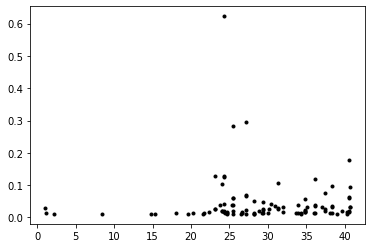

In [31]:
plt.plot(freq, amp, '.k')

In [5]:
fund = []
overtone = []
amplitude = []
amp = []
for file in tqdm.tqdm(files):
    try:
        freq, amp, phi = np.loadtxt(file, unpack=True)
        fund.append(freq[0])
        overtone.append(freq[1:])
        amplitude.append(amp[1:])
        amp.append(amp[0])
    except:
        continue
        
fund = np.array(fund)
overtone = np.array(overtone)

100%|██████████| 2158/2158 [00:19<00:00, 111.23it/s]


In [6]:
amp = np.array(amp)

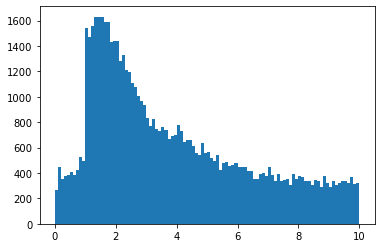

In [10]:
plt.hist(all_freq, range=(0, 10), bins=100);

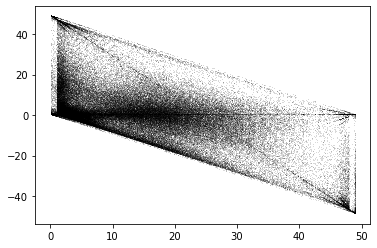

In [61]:
plt.plot((all_freq)[:-1], np.diff(all_freq), ',k', alpha=0.15)

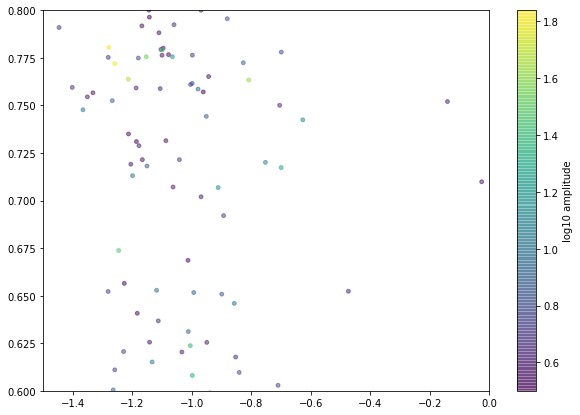

In [42]:
plt.figure(figsize=[10,7])

m = np.log10(amplitude) > 0.5
plt.scatter(np.log10(1/fund)[m], 1/((1/fund) / (1/overtone))[m],c=np.log10(amplitude)[m], s=15, alpha=0.5)
plt.scatter(np.log10(1/fund)[m], ((1/fund) / (1/overtone))[m],c=np.log10(amplitude)[m], s=15, alpha=0.5)
plt.ylim(0.6,0.8)
plt.xlim(-1.5, 0.)
plt.colorbar(label='log10 amplitude')